In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
#Determine the columns for referencing 
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
        print(column["name"], column["type"])
        
        

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
#Determine the columns for referencing
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
        print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
firstdate = session.query(Measurement.date).order_by(Measurement.date).first()
print(firstdate)

('2010-01-01',)


In [12]:
#Calculating last date for measure
lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(lastdate)

('2017-08-23',)


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_twelve_mos = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_twelve_mos)

2016-08-23


In [14]:
# Calculate the date one year from the last date in data set.
one_year_from_last_date = dt.date(2017, 8, 23) + dt.timedelta(days=365)
print(one_year_from_last_date)

2018-08-23


In [15]:
# Perform a query to retrieve the data (date?) and precipitation scores
#Unsure what this question is asking for********
cols = [Measurement.date, Measurement.prcp]

precip_scores = session.query(*cols).\
    filter(Measurement.date).all() 

print(precip_scores)

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_table = pd.DataFrame(precip_scores, columns = ['Date', 'Precipitation (inch)'])
precip_table.head()

,Date,Precipitation (inch)
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN


In [17]:
# Sort the dataframe by date
precip_table = precip_table.sort_values('Date')
precip_table.head()

,Date,Precipitation (inch)
0,2010-01-01,0.08
9007,2010-01-01,0.21
9518,2010-01-01,0.15
12187,2010-01-01,0.15
14959,2010-01-01,0.05


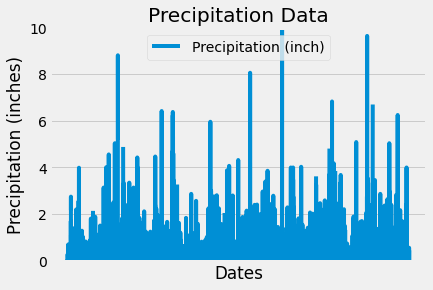

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = precip_table.plot('Date', 'Precipitation (inch)', title = 'Precipitation Data')
precip_plot.set_xlabel("Dates")
precip_plot.set_ylabel("Precipitation (inches)")
plt.xticks([])
plt.ylim(0, 10)
plt.legend(loc = "upper center")
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_table.describe()

,Precipitation (inch)
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
station_ct = session.query(func.count(Station.station)).all()
print(station_ct)

[(9,)]


In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
                   
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()